In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Covid19_India.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [4]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0396
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0066
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0061
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0062
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0061
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - lo

1198/1198 [==============================] - 4s 4ms/step - loss: 0.0017
Epoch 98/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0013


In [6]:
dataset_test = pd.read_csv('Covid19_India_Test.csv')
Real Covid19_India numberse = dataset_test.iloc[:, 1:2].values

# Getting the predicted Covid19 situation in India of 2020
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_Covid19_India_cases= regressor.predict(X_test)
predicted_Covid19_India_cases = sc.inverse_transform(predicted_Covid19_India_cases)

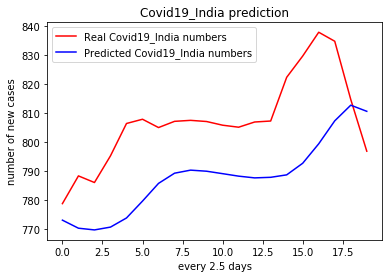

In [10]:
plt.plot(Real Covid19_India numbers, color = 'red', label = 'Real Covid19_India numbers')
plt.plot(predicted Covid19_India numbers, color = 'blue', label = 'Predicted Covid19_India numbers')
plt.title('Covid19_India prediction')
plt.xlabel('every 2.5 days')
plt.ylabel('number of new cases')
plt.legend()
plt.show()